<h1> <center> Dashboard </center> </h1>

In [11]:
import einops
import torch
import numpy as np
from PIL import Image
import json
from json2html import *
import tempfile
import webbrowser
import os
from glob import glob

#### 1. Load the model

In [12]:
#from models.TransUNet.model import MyTransUNet#, build_the_model
from models.TwoTilesSegmenter.TwoTilesSegmenter import build_the_model, Segmenter, build_the_dataloader

In [14]:
model = build_the_model(
    device="cpu",
    model_path="models/TwoTilesSegmenter/Parameters/seg-4-epoch=23-val_iou=0.2534.ckpt"
)

model_name = "seg-1"

Trainable parameters amount: 42217922


#### 2. Load the company test dataset via custom dataloader

In [15]:
main_dataloader = build_the_dataloader(
    batch_size=1,
    img_path="/home/student/Documents/Xrays/Data/company_target_images",
    mask_path="/home/student/Documents/Xrays/Data/company_target_masks/",
    name="main_targets"
)

In [16]:
jenya_dataloader = build_the_dataloader(
    batch_size=1,
    img_path="/home/student/Documents/Xrays/Data/jenya_target_images",
    mask_path="/home/student/Documents/Xrays/Data/jenya_target_masks",
    name="jenya_targets"
)

In [17]:
sg_dataloader = build_the_dataloader(
    batch_size=1,
    img_path="/home/student/Documents/Xrays/Data/strange_gun_images_targets",
    mask_path="/home/student/Documents/Xrays/Data/strange_gun_masks_targets",
    name="strange_gun"
)

# TODO: добавить тестовую выборку (dataloader)

#### 3. Build the Dashboard

In [18]:
from dashboard import Board

In [19]:
def render_fn(x):
#     print("XXX ", x.shape)
    if len(x.shape) == 3:
        x = einops.rearrange(x, "c h w -> (c h) w", c=1)
        x = (x - x.min()) / (x.max() - x.min())
        x *= 255
        x = x.to(torch.uint8)
        x = np.array(x.cpu())
    else:
        x = einops.rearrange(x, "b c h w -> (b c h) w", b=1, c=1)
        x =  (x > 0.5).float()
        x *= 255
        x = x.to(torch.uint8)
        x = np.array(x.cpu())
    
    return x

In [20]:
board = Board(
    dataloaders=[            # dataloader returns tuple of any types objects
        main_dataloader,
        jenya_dataloader,
        sg_dataloader
    ],
    model=model,            # model returns object that go right in the measure() and
                            # go in the render() wrapped with render_fn
    model_name=model_name,  # name of the model
    render_fn=render_fn,
    render_dl_idx=2,        # index of dataloader we need to render
    obj_item=1,             # index of element in tuple from dataloader that will be rendered
    obj_name_item=2,        # index of filename
    to_model_item=0,        # image
    limit=6,                # amount of rendered objects
    phs_in_row=3,           # amount of rendered objects in row
    get_randomly=False,     # it's usefull if dataloader is big and 
                            # we want to get different :limit: object from it to render  
    c=3
)

#### 4. Run the Dashboard

Try to form a storage with 57 objects from dataloader. Device: cpu
Try to form a storage with 35 objects from dataloader. Device: cpu
Try to form a storage with 6 objects from dataloader. Device: cpu
Storages has been formed
Render...


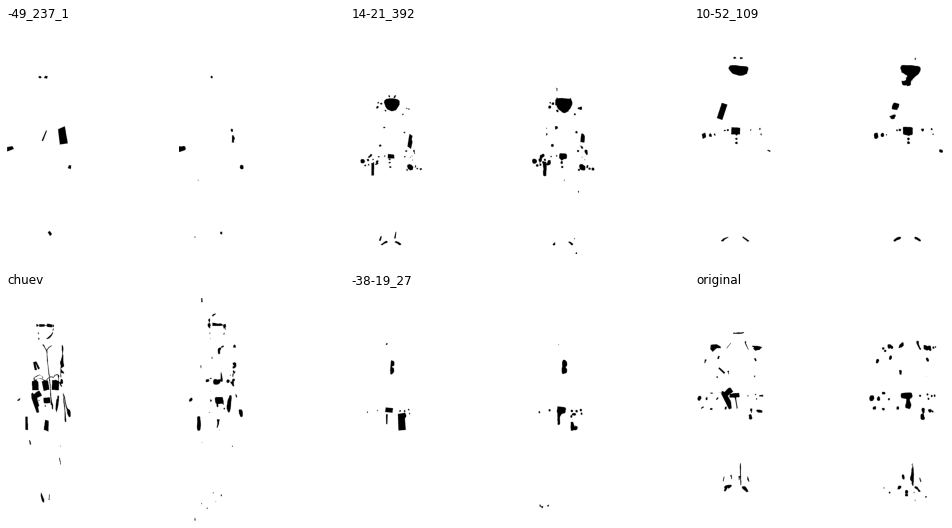

Measure...
Load IoU interface from metrics/IoU.py
Load IoU interface from metrics/IoU.py
Load IoU interface from metrics/IoU.py
CPU times: user 13min 13s, sys: 47.1 s, total: 14min
Wall time: 2min 22s


In [21]:
%%time
report = board.run(device="cpu")

#### 5. View report as html

In [22]:
board.view(report)

#### 6. Dump report to the storage

In [24]:
board.dump(report)

Do you want add report in the storage? ('y' or 'n') y


In [ ]:
алексею викторовичу позвонить про сервак
август тг есть 
тел его скинут
и видосик пришлют